### Аналитика в авиакомпании

Необходимо изучить базу данных российской авиакомпании, выполняющей внутренние пассажирские авиаперевозки, и определить предпочтения пользователей, покупающих билеты на те или иные направления.

В результате предварительного анализа удалось установить, что зависимости между городскими фестивалями и количеством прибывающих рейсов нет. 

**Описание данных**

Таблица 1 (query_1.csv, результат предварительного анализа):
- `model` - модель самолёта
- `flights_amount` - количество рейсов для каждой модели самолетов model в сентябре 2018 года

Таблица 2 (query_3.csv, результат предварительного анализа):
- `city` - город
- `average_flights` - среднее количестве рейсов, прибывающих в город city за день в августе 2018 года

**План работы**  <a id="plan"></a>

1. [Обзор данных. Первичное исследование данных](#st1)
1. [Исследовательский анализ данных](#st2)
1. [Общий вывод](#st3)

### [1. Обзор данных](#plan) <a id="st1"></a> 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import requests
import re 
from bs4 import BeautifulSoup
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


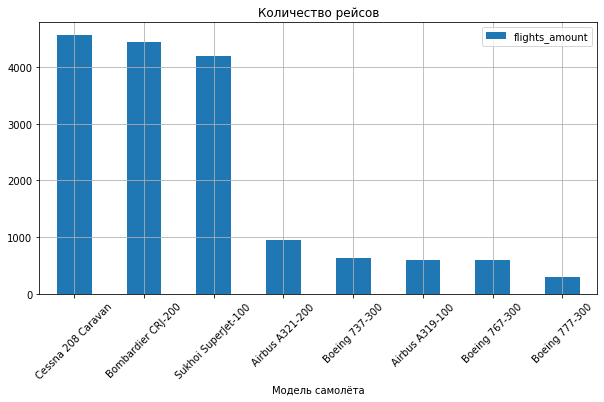

In [2]:
# Импортируем и изучим данные о полётах по моделям самолётов: 
flights = pd.read_csv('05_query_1.csv')
display(flights.info())
display(flights.sort_values('flights_amount', ascending=False))

flights.sort_values('flights_amount', ascending=False).plot(x='model', y='flights_amount', grid=True, kind='bar', title='Количество рейсов', figsize=(10, 5))
plt.xticks(rotation=45)
plt.xlabel('Модель самолёта')
plt.show()

Проблем с типами данных нет.
Значительно чаще остальных летают Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Реже всех поднимается в небо Boeing 777-300.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


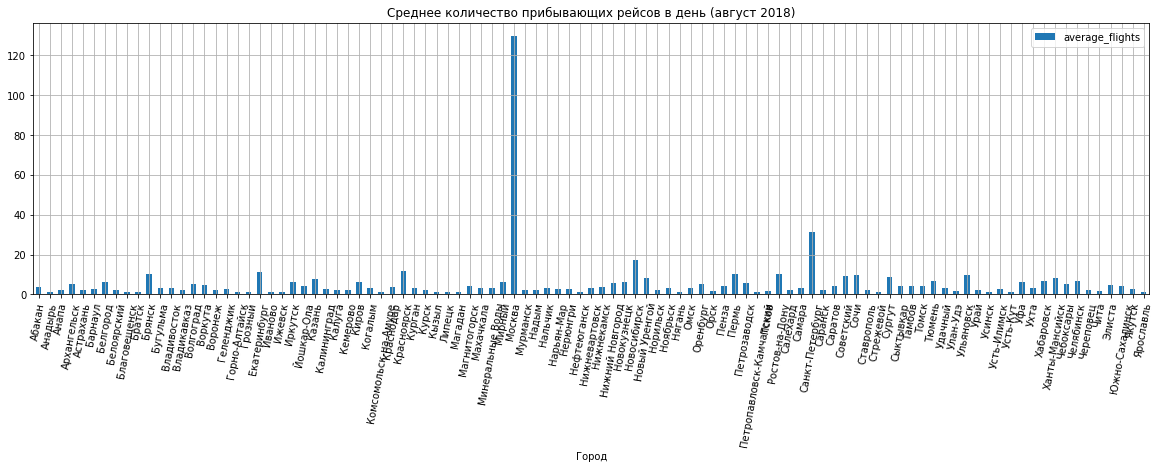

In [3]:
# Изучим данные о полётах: 
cities = pd.read_csv('05_query_3.csv')
display(cities.info())
display(cities)
display(cities.describe())

cities.plot(x='city', y='average_flights', grid=True, kind='bar', title='Среднее количество прибывающих рейсов в день (август 2018)', figsize=(20, 5))
plt.xticks(rotation=80)
plt.xlabel('Город')
plt.show()

В базе данные по 101 городу. Пропущенных и отрицательных значений нет. Проблем с типами данных так же нет.

Абсолютный лидер по количеству прибывающих рейсов в день - Москва, на втором месте Санкт-Петербург. Далее выделяются крупные города - административные и транспортные центры.

### [2. Исследовательский анализ данных](#plan) <a id="st2"></a> 

**Топ-10 городов по количеству рейсов:**

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


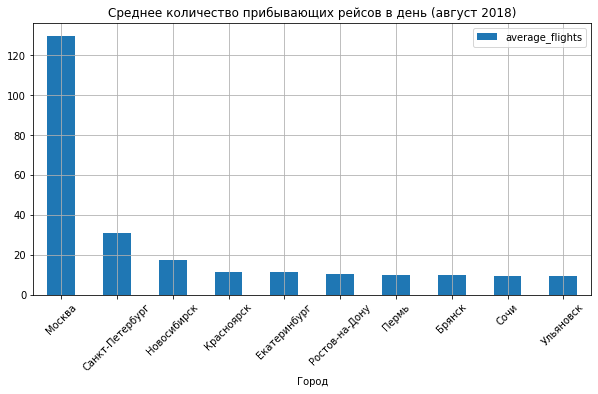

,city,average_flights,share
43,Москва,129.774194,0.517694
70,Санкт-Петербург,31.161290,0.124308
54,Новосибирск,17.322581,0.069103
33,Красноярск,11.580645,0.046197
20,Екатеринбург,11.322581,0.045168
67,Ростов-на-Дону,10.193548,0.040664
63,Пермь,10.129032,0.040407
10,Брянск,10.000000,0.039892
74,Сочи,9.612903,0.038348
84,Ульяновск,9.580645,0.038219


In [4]:
top_cities = cities.sort_values('average_flights', ascending=False).head(10)
display(top_cities)

top_cities.plot(x='city', y='average_flights', grid=True, kind='bar', title='Среднее количество прибывающих рейсов в день (август 2018)', figsize=(10, 5))
plt.xticks(rotation=45)
plt.xlabel('Город')
plt.show()

top_cities = top_cities.assign(share = lambda x: x.average_flights / x.average_flights.sum())
display(top_cities)

Добавим в таблицу данные о населении.

In [5]:
# Загрузим данные о населении из Википедии:
URL = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9'
req = requests.get(URL)
soup=BeautifulSoup(req.text, 'lxml')

table = soup.find('table')

content=[] 
for row in table.find_all('tr'): 
    if not row.find_all('th'): 
            content.append([element.text for element in row.find_all('td')])
            
big_cities = pd.DataFrame(content) 
big_cities = big_cities[[2, 19]] # Оставим только два столбца - Название города и Население (тыс. чел.) за 2018г.
big_cities.columns = ['city', 'population']
big_cities['city'] = big_cities['city'].apply(lambda x: re.sub(r'[\d\[\]\\]', '', x)) # Удалили ссылки из названий городов
big_cities['population'] = big_cities['population'].astype('int64')
big_cities.sort_values(by='population', ascending=False, inplace=True)
display(big_cities.head(20))

,city,population
0,Москва,12506
1,Санкт-Петербург,5352
2,Новосибирск,1613
3,Екатеринбург,1469
5,Нижний Новгород,1259
4,Казань,1244
6,Челябинск,1202
8,Омск,1172
7,Самара,1163
9,Ростов-на-Дону,1130


In [6]:
# Теперь добавим столбец с населением в нашу таблицу Топ-10:
top_cities = top_cities.join(big_cities.set_index('city'), on='city')
display(top_cities)

,city,average_flights,share,population
43,Москва,129.774194,0.517694,12506
70,Санкт-Петербург,31.161290,0.124308,5352
54,Новосибирск,17.322581,0.069103,1613
33,Красноярск,11.580645,0.046197,1091
20,Екатеринбург,11.322581,0.045168,1469
67,Ростов-на-Дону,10.193548,0.040664,1130
63,Пермь,10.129032,0.040407,1052
10,Брянск,10.000000,0.039892,406
74,Сочи,9.612903,0.038348,424
84,Ульяновск,9.580645,0.038219,627


На первых местах оказались крупнейшие города России - административные центры с крупными транспортными узлами.
В Топ-10 больше половины всех рейсов (~ 52%) прибывают в Москву, 12% - в Санкт-Петербург, 7% - в Новосибирск, и оставшиеся 29% - в другие города России.
В десятку также попал г. Сочи - крупнейший курортный город и г. Ульяновск, расположенный в месте сближения русел Волги и Свияги - на очень живописной местности.

### [3. Общий вывод](#plan) <a id="st3"></a> 

В ходе анализа установлено, что связи между проведением городских фестивалей и количеством прибывающих рейсов нет.

Самый большой поток прибывает в Москву (> 50% всех рейсов), Санкт-Петербург (> 10%) и Новосибирск (~7%). В целом, в Топ-10 попали крупнейшие города России - административные центры с крупными транспортными авиа- и железнодорожными узлами.

Касаемо моделей самолётов, значительно чаще остальных летают Cessna 208 Caravan (до 14 пассажиров), Bombardier CRJ-200 (до 52 пассажиров) и Sukhoi SuperJet-100 (до 108 пассажиров) - ближнемагистральные/региональные перевозчики. 
Реже всех поднимается в небо Boeing 777-300 (до 550 пассажиров) - широкофюзеляжный пассажирский самолёт для авиалиний большой протяжённости.

Суммируя выводы, можно сказать, что в целом пассажиры предпочитают летать в ближние крупные города и чаще всего - в Москву.